In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product i.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product I,Anti Alergic,January,2019,50833,600282,1024825,1
2019-02-01,Product I,Anti Alergic,February,2019,65670,775491,1323949,2
2019-03-01,Product I,Anti Alergic,March,2019,89667,1058869,1807743,3
2019-04-01,Product I,Anti Alergic,April,2019,60960,719871,1228992,4
2019-05-01,Product I,Anti Alergic,May,2019,43410,512625,875173,5
2019-06-01,Product I,Anti Alergic,June,2019,38023,449010,766568,6
2019-07-01,Product I,Anti Alergic,July,2019,39097,461693,788220,7
2019-08-01,Product I,Anti Alergic,August,2019,54870,647955,1106214,8
2019-09-01,Product I,Anti Alergic,September,2019,66773,788516,1346186,9


In [4]:
sales_i= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_i.shape

(60, 3)

In [6]:
sales_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_i['Sales'].sum())
print('Total Market Size:',sales_i['Market Size'].sum())
print('Total Marketing Expense:', sales_i['Marketing Expense'].sum())

Total Sales: 5783407
Total Market Size: 67317237
Total Marketing Expense: 103103398


Text(0.5, 1.0, 'Product I')

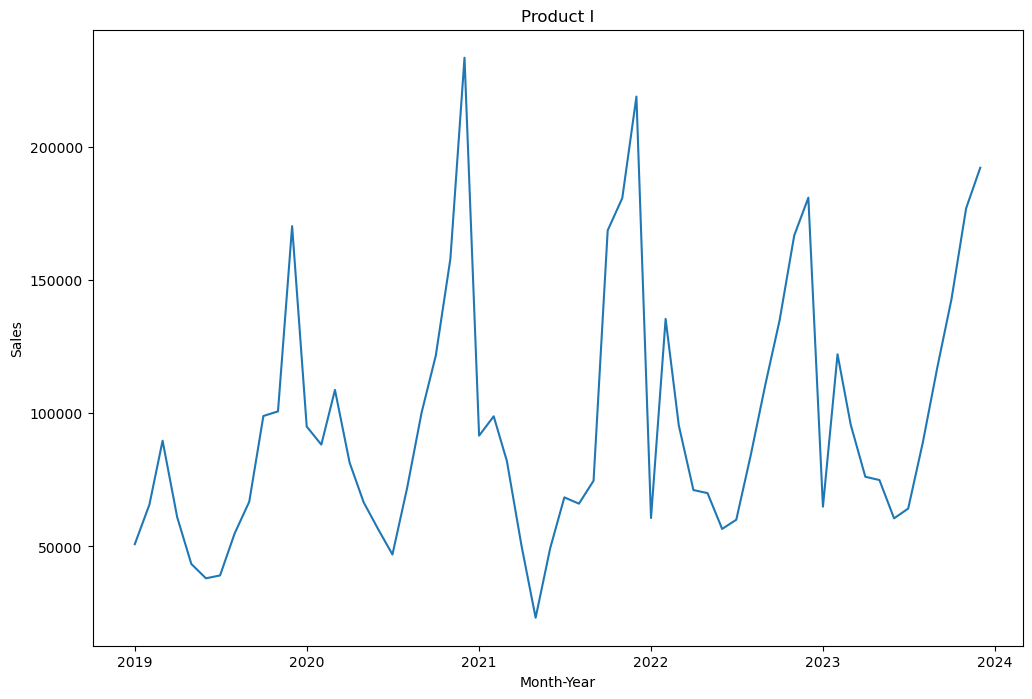

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_i['Sales'])
plt.title('Product I')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_i['Sales'])

ADF Statistics: -2.5790376657087335
p- value: 0.09740761251652458
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_i_diff= sales_i['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product I - First Difference')

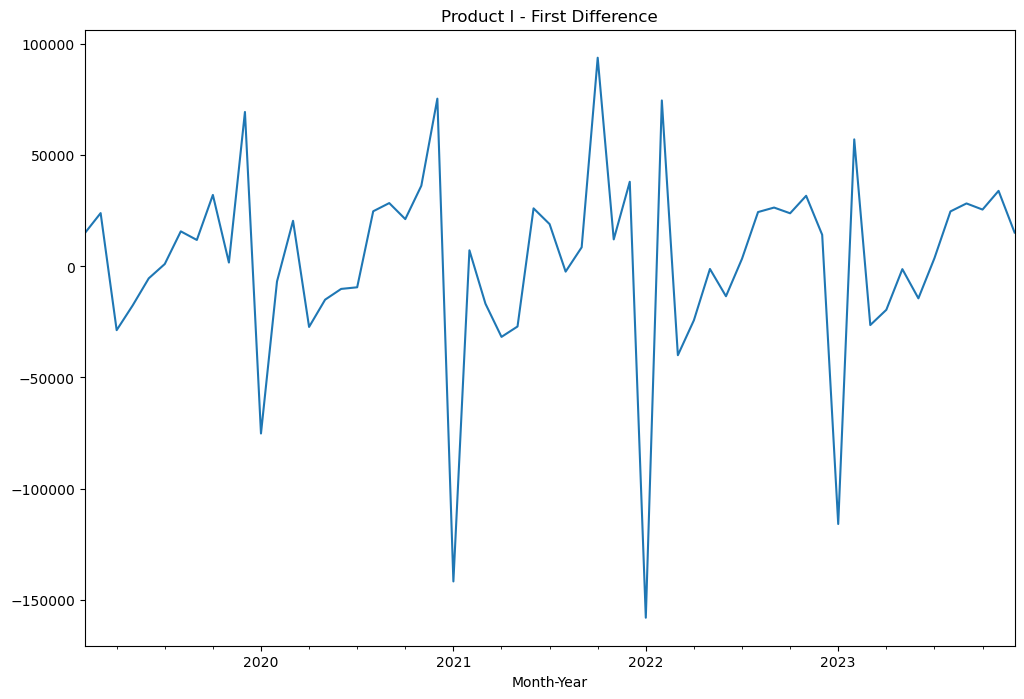

In [13]:
sales_i_diff.plot(figsize=(12,8))
plt.title('Product I - First Difference')

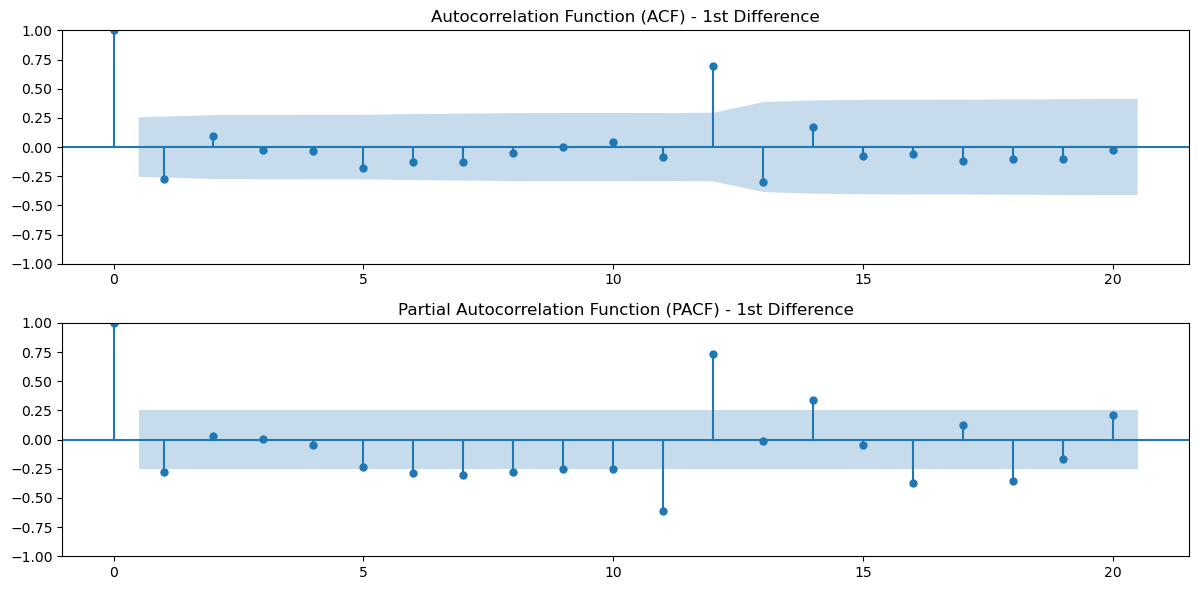

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_i_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_i_diff)

ADF Statistics: -3.6173278718862623
p- value: 0.005438267272077221
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_i[:54]
test=sales_i[54:]

In [17]:
len(train)

54

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_i)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
4   1  1  1241.124423  1250.975882  18427.990108  8.647387e+08  29406.439583
1   0  1  1242.040718  1249.921886  18917.493760  9.182405e+08  30302.482673
7   2  1  1242.419163  1254.240914  17994.370050  8.148960e+08  28546.383973
2   0  2  1242.421189  1252.272648  18028.212133  8.218229e+08  28667.454279
5   1  2  1244.413814  1256.235566  18020.316072  8.203467e+08  28641.695484
10  3  1  1244.418049  1258.210093  17952.922625  8.139932e+08  28530.565472
8   2  2  1246.117101  1259.909145  17960.049049  8.175274e+08  28592.436813
13  4  1  1246.743520  1262.505856  17993.874844  8.212664e+08  28657.745355
11  3  2  1247.976191  1263.738527  17925.749201  8.134061e+08  28520.275423
9   3  0  1248.802901  1260.624653  19479.414364  9.287811e+08  30475.910356
14  4  2  1248.977716  1266.710344  18051.966989  8.224292e+08  28678.025830
16  5  1  1248.989618  1266.722245  17996.481850  8.261391e+08  28742.636065

In [23]:
m_arima= ARIMA(train['Sales'], order=(1,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -615.562
Date:                Thu, 09 May 2024   AIC                           1241.124
Time:                        18:49:55   BIC                           1250.976
Sample:                    01-01-2019   HQIC                          1244.913
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.0973      0.014      6.762      0.000       0.069       0.126
Marketing Expense    -0.0169      0.010     -1.716      0.086      -0.036       0.002
ar.L1                -0.

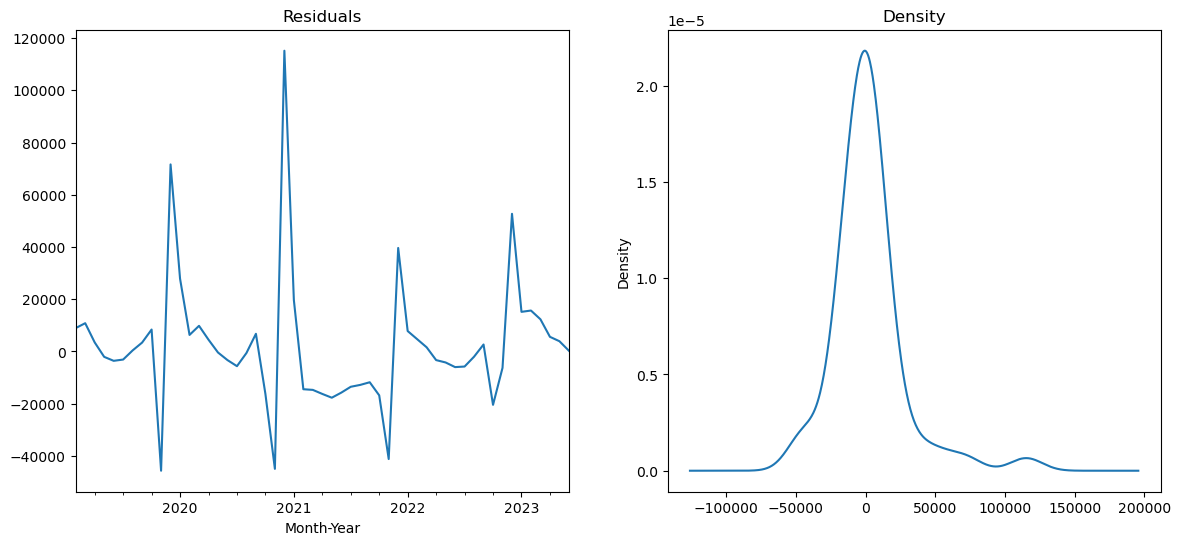

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

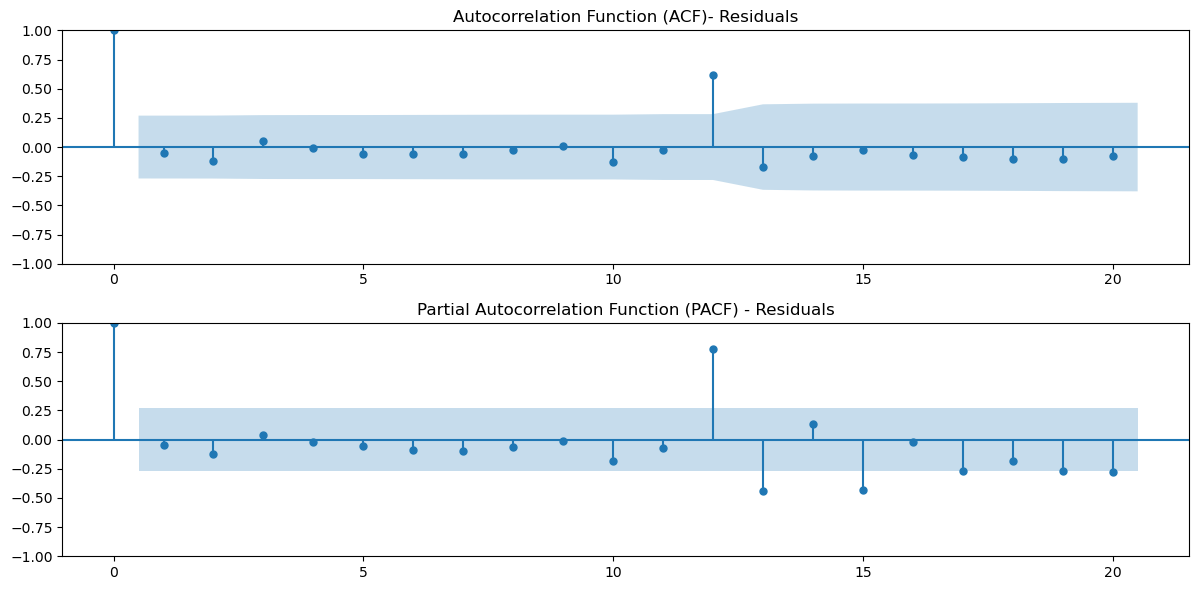

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

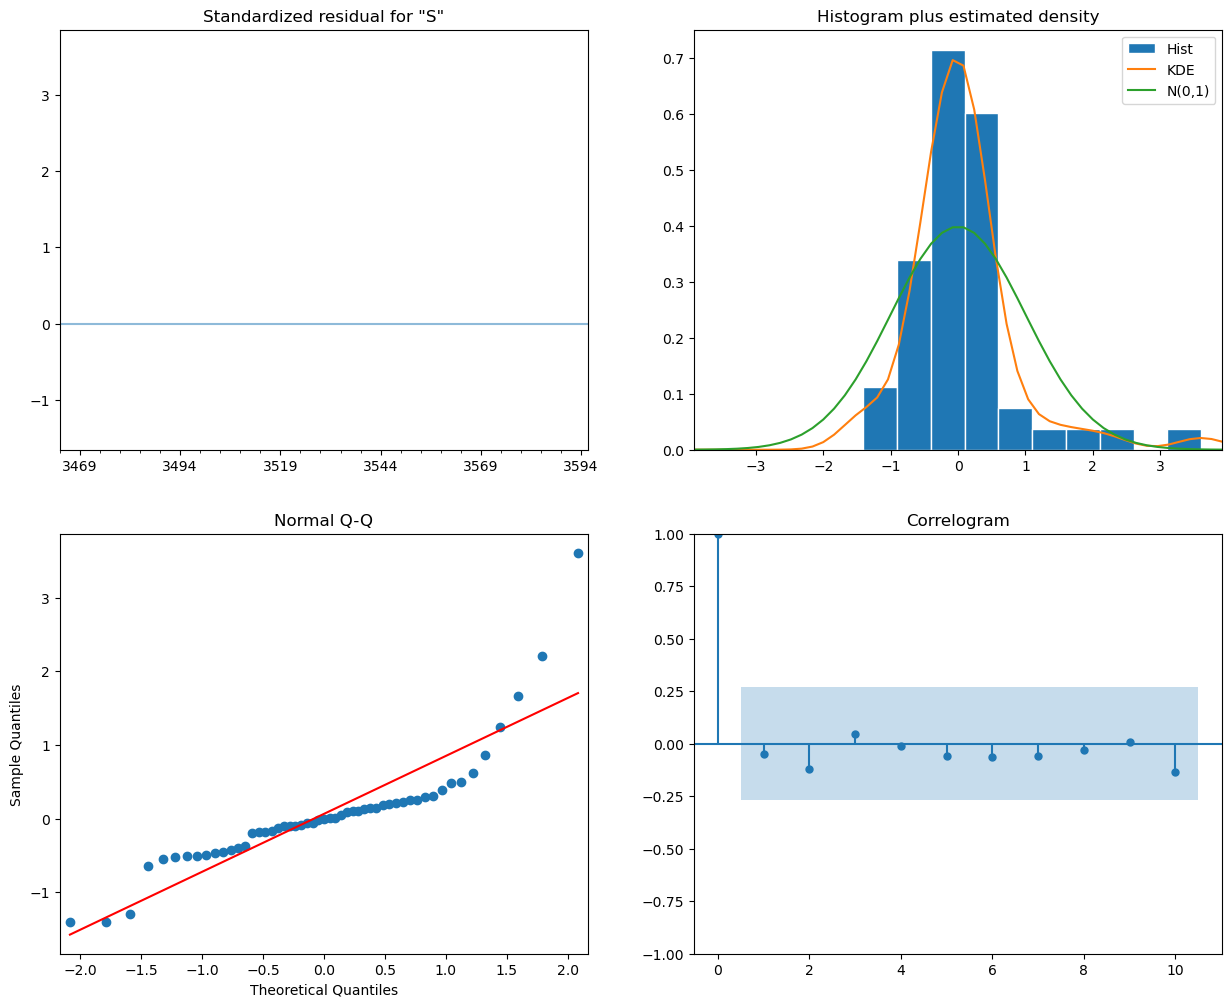

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_i)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_i['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

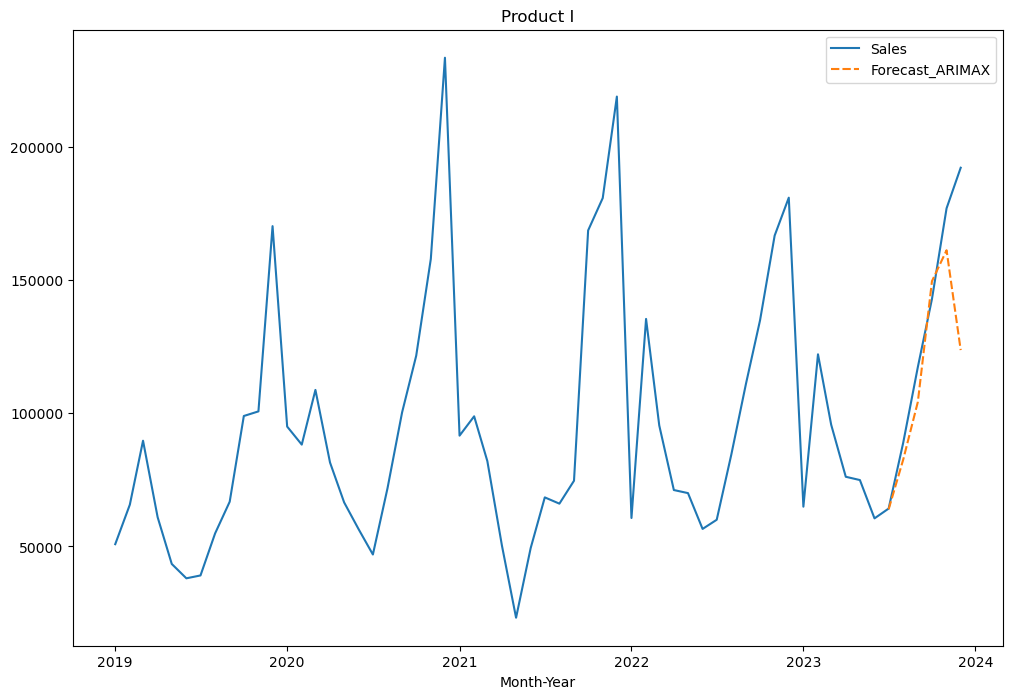

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_ARIMAX']])
plt.title('Product I')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 18427.99010802625
MAPE - ARIMAX: 0.113189336125741
MSE - ARIMAX: 864738688.9478917
RMSE - ARIMAX: 29406.43958298746


# SARIMA

In [33]:
import statsmodels.api as sm

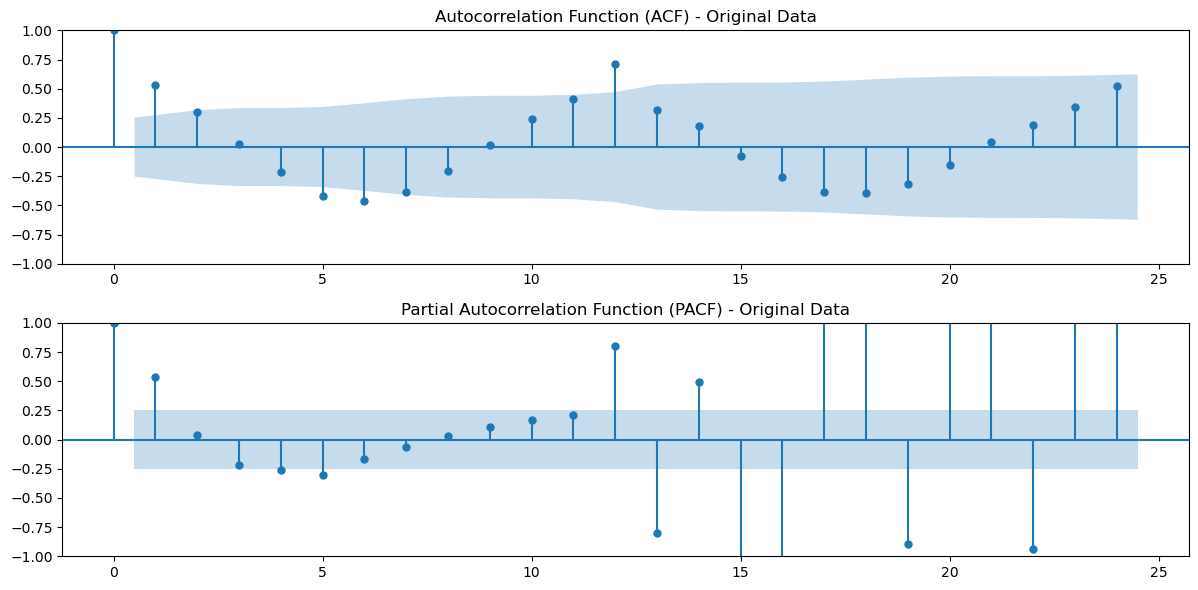

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_i['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

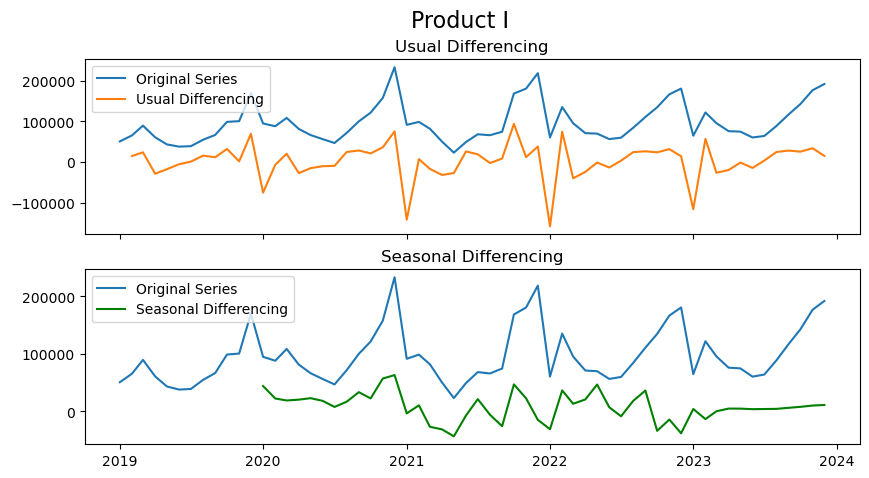

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_i['Sales'], label='Original Series')
axes[0].plot(sales_i['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_i['Sales'], label='Original Series')
axes[1].plot(sales_i['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product I', fontsize=16)
plt.show()

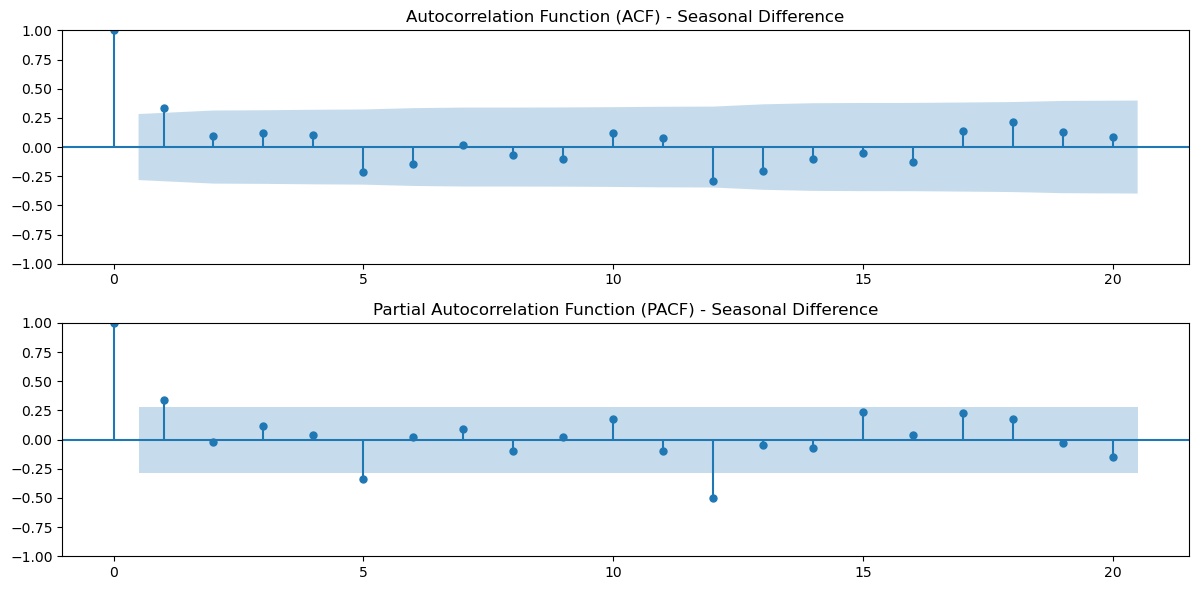

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_i['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

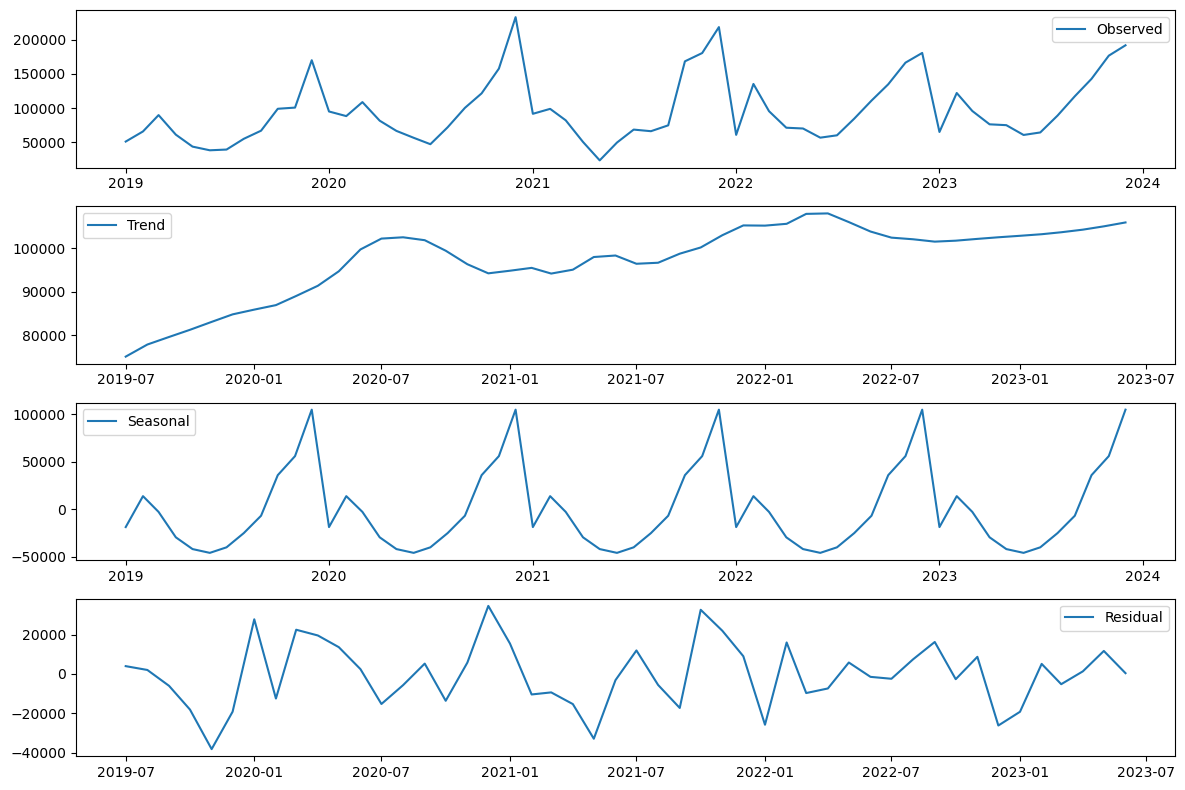

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_i['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q         aic         bic           mae           mse
4  2  0  920.468305  932.463309  14114.755759  3.509826e+08
6  3  0  922.247354  935.955931  12875.484292  3.100759e+08
5  2  1  922.267087  935.975663  12858.918982  3.091840e+08
7  3  1  924.245016  939.667164  12912.044704  3.113935e+08
3  1  1  928.968790  940.963794  10207.504839  1.969418e+08
0  0  0  929.839081  938.406941   9304.360592  1.255341e+08
1  0  1  931.569592  941.851024   8942.350703  1.210460e+08
2  1  0  931.785638  942.067070   9247.623128  1.245201e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -453.234
Date:                             Thu, 09 May 2024   AIC                            920.468
Time:                                     18:51:33   BIC                            932.463
Sample:                                 01-01-2019   HQIC                           924.836
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1090      0.026      4.227      0.000       0.058       0.160
Market

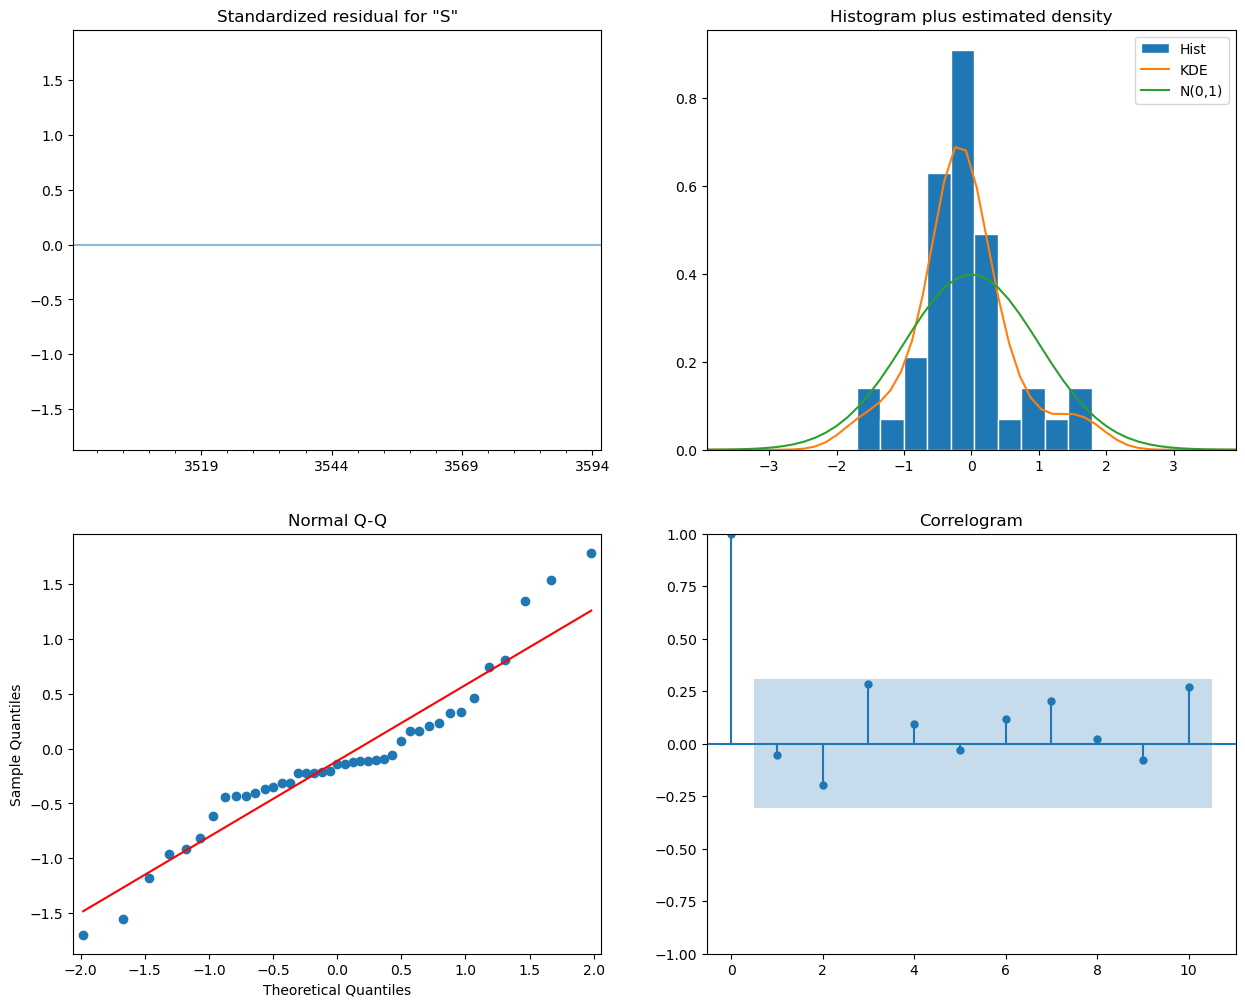

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_i['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product I')

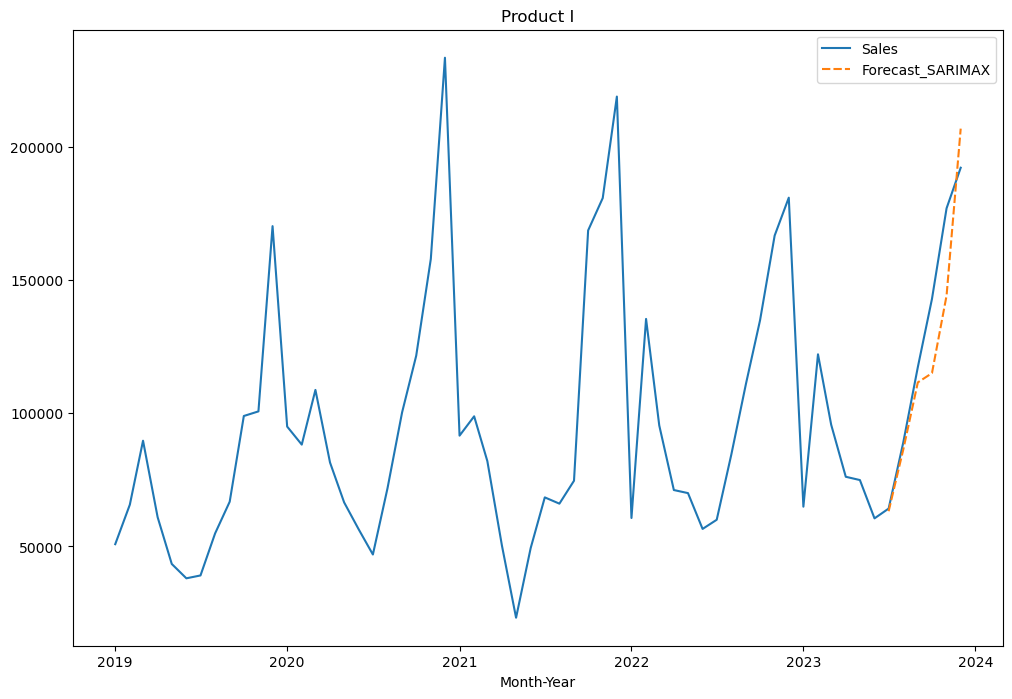

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_SARIMAX']])
plt.title('Product I')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 14114.756
MAPE - SARIMAX: 0.092
MSE - SARIMAX: 350982639.482
RMSE - SARIMAX: 18734.531


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=964.532, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.715, Time=0.25 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=965.596, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=964.741, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=966.728, Time=0.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=966.520, Time=0.74 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=963.704, Time=5.19 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=7.62 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=967.853, Time=4.76 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=966.211, Time=2.39 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=968.011, Time=4.50 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=961.943, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]  

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -476.621
Date:                             Thu, 09 May 2024   AIC                            959.242
Time:                                     18:54:10   BIC                            964.382
Sample:                                 01-01-2019   HQIC                           961.114
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5175      0.209      2.476      0.013       0.108       0.927
ma.L1         -0.8913      0.102     -8.731      0.000      -1.091      -0.691
sigma2      7.518e+08   7.86e-11   9.57e+18      0.000    7.52e+08    7.52e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.34   Prob(JB):                         0.72
Heteroskedasticity (H):               0.90   Skew:                             0.31
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+35. Standard errors may be unstable.
"""

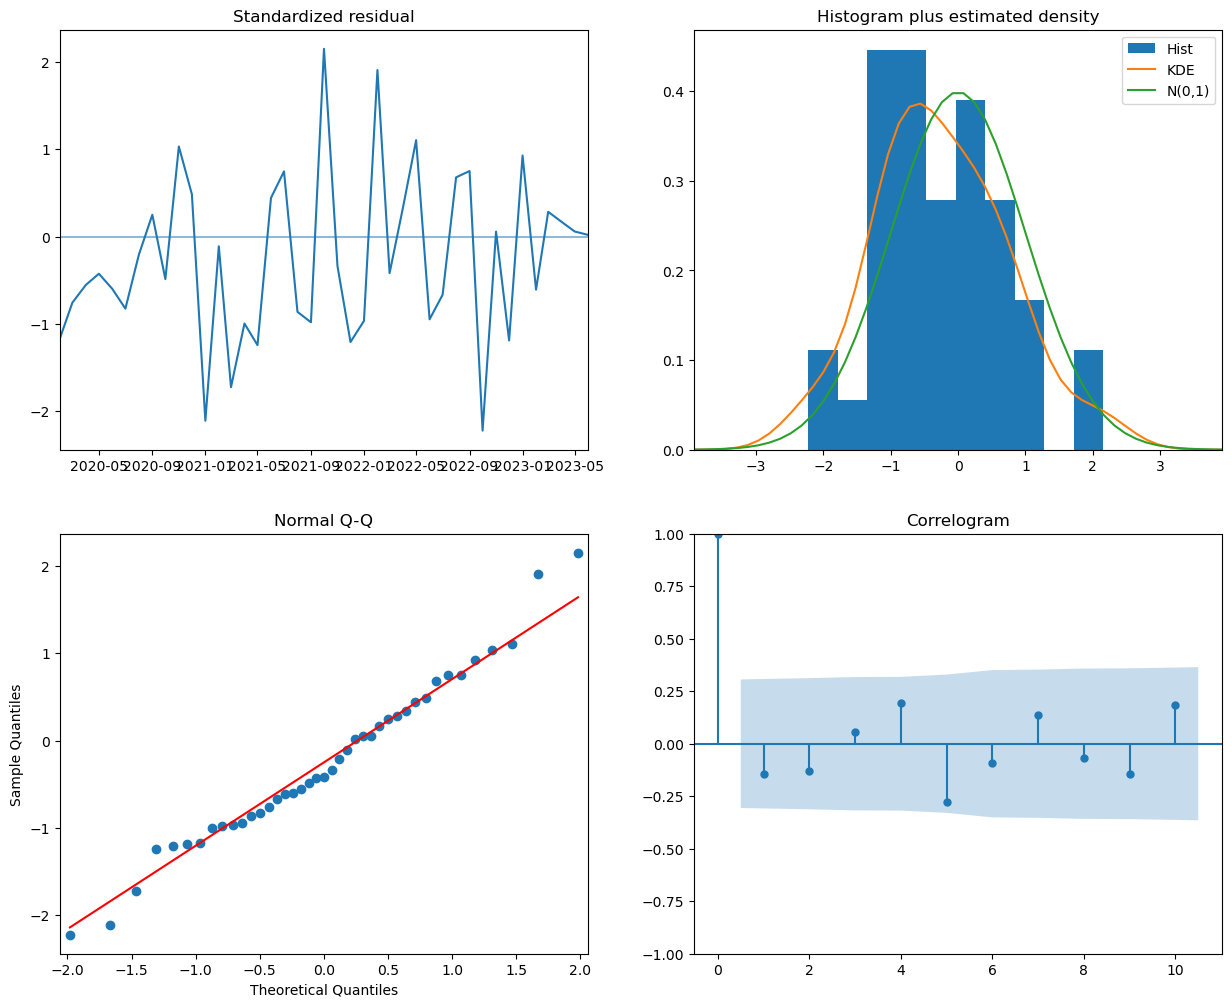

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_i['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product I')

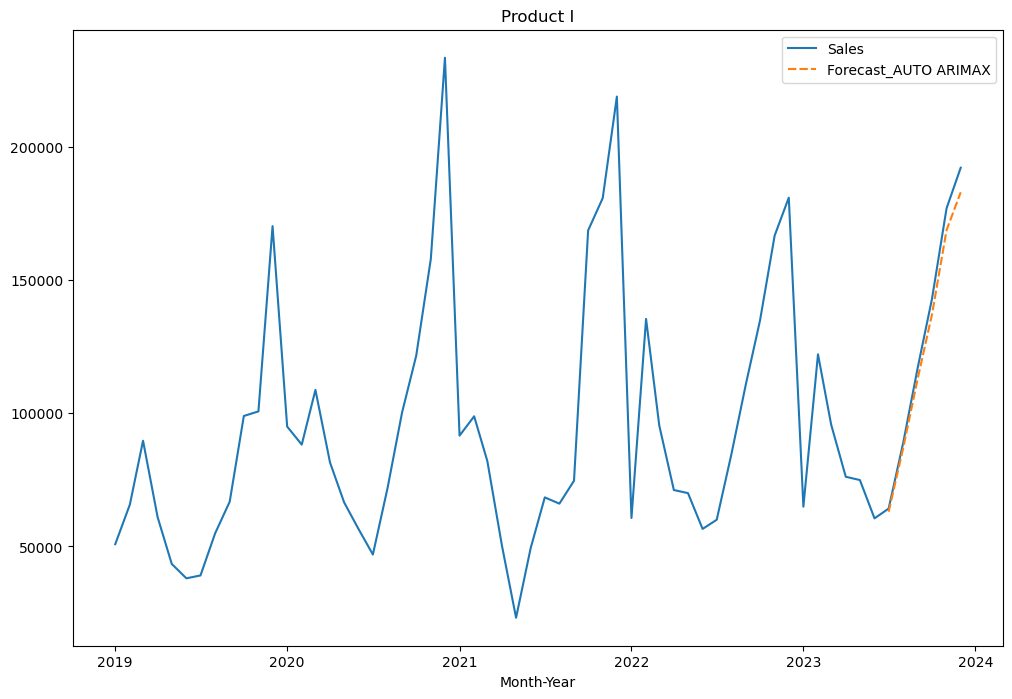

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product I')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 5089.287482194883
MAPE - AUTO ARIMAX: 0.03517085526260402
MSE - AUTO ARIMAX: 34751910.885219134
RMSE - AUTO ARIMAX: 5895.075138216572


In [53]:
sales_i.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,64906,802857,1699017,NaN,NaN,NaN
2023-02-01,122096,1510270,3196056,NaN,NaN,NaN
2023-03-01,95682,1183541,2504628,NaN,NaN,NaN
2023-04-01,76134,941742,1992928,NaN,NaN,NaN
2023-05-01,74900,926478,1960626,NaN,NaN,NaN
2023-06-01,60518,748579,1584154,NaN,NaN,NaN
2023-07-01,64200,794124,1680537,63924.650440,63203.706805,63005.848145
2023-08-01,88953,1100307,2328485,82607.461388,86290.609504,86979.583980
2023-09-01,117297,1450909,3070434,104217.075060,111563.416516,113213.315594


In [54]:
sales_i.mean()

Sales                   9.639012e+04
Market Size             1.121954e+06
Marketing Expense       1.718390e+06
Forecast_ARIMAX         1.141907e+05
Forecast_SARIMAX        1.211676e+05
Forecast_AUTO ARIMAX    1.253025e+05
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,18427.990108,0.113189,8.647387e+08,29406.439583
AUTO ARIMAX,5089.287482,0.035171,3.475191e+07,5895.075138
SEASONAL ARIMAX,14114.755759,0.091817,3.509826e+08,18734.530672


# TESTING

In [19]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=976.737, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=975.021, Time=0.07 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=975.785, Time=0.26 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=976.354, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=976.081, Time=0.16 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=976.543, Time=0.50 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=975.016, Time=0.36 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=975.080, Time=0.66 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=976.251, Time=0.90 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=972.428, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=972.422, Time=0.18 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=973.984, Time=0.35 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=972.828, Time=0.11 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=974.229, Time=0.27 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=974.076, Time=0.67 sec
 ARIMA(0,0

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -482.882
Date:                            Wed, 08 May 2024   AIC                            971.763
Time:                                    20:13:07   BIC                            976.976
Sample:                                01-01-2019   HQIC                           973.674
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4678.9296   3835.303      1.220      0.222   -2838.127    1.22e+04
ar.L1          0.2856      0.122      2.337      0.019       0.046       0.525
sigma2      5.772e+08      0.008    7.6e+10      0.000    5.77e+08    5.77e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.74   Prob(JB):                         0.82
Heteroskedasticity (H):               1.20   Skew:                             0.08
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.98e+27. Standard errors may be unstable.
"""

In [21]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_i['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product I')

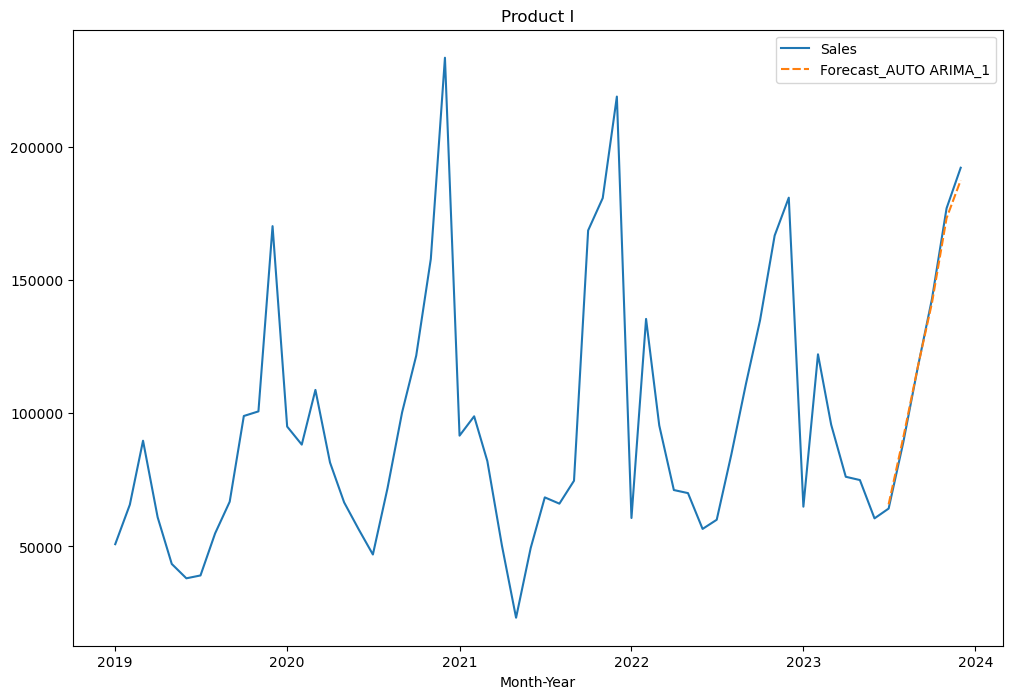

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product I')

In [23]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 2245.579128734651
MAPE - AUTO ARIMA: 0.017134189753286816
MSE - AUTO ARIMA: 7310403.623093743
RMSE - AUTO ARIMA: 2703.77580858579
